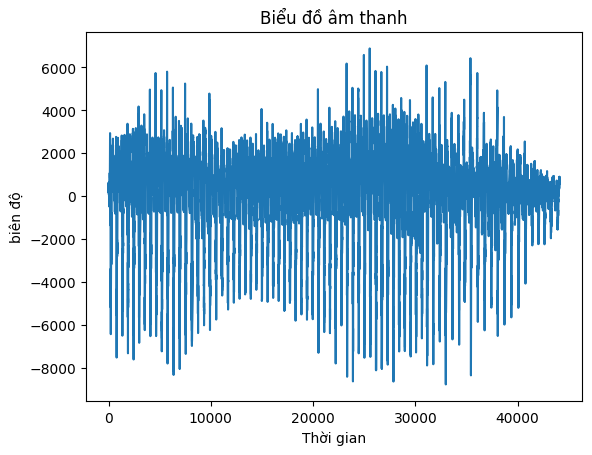

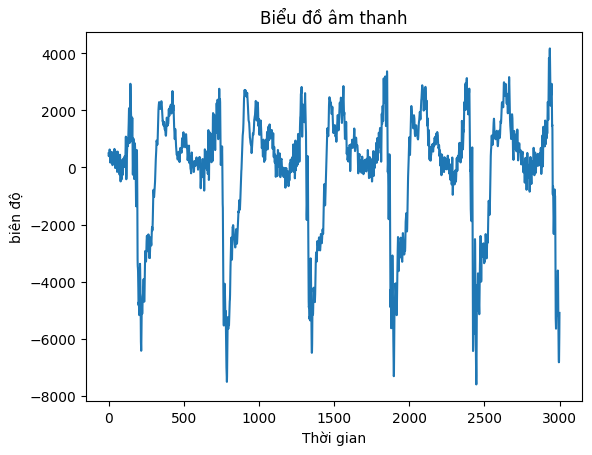

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
# Mở file JSON
with open("./training/Snore.Thanh.WAV.44u5bgjh.ingestion-6bb4987c-vcm6n.s3.json", "r") as f:
    data = json.load(f)
  
audio_data = data["payload"]["values"]

plt.plot(audio_data)
plt.title('Biểu đồ âm thanh')
plt.xlabel('Thời gian')
plt.ylabel('biên độ')
plt.show()
# Lặp qua dữ liệu

plt.plot(audio_data[0:3000])
plt.title('Biểu đồ âm thanh')
plt.xlabel('Thời gian')
plt.ylabel('biên độ')
plt.show()

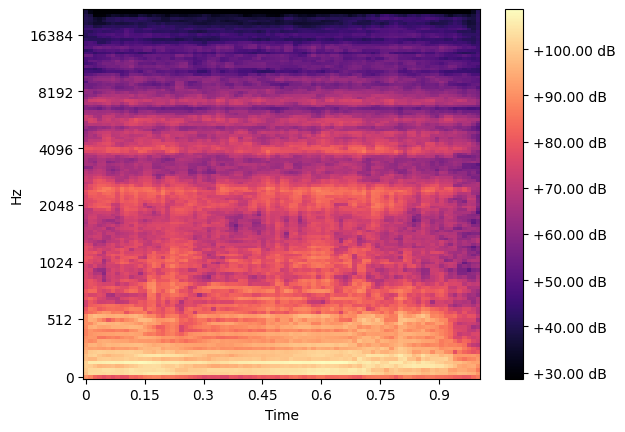

In [2]:
import librosa.display

audio_data = np.array(audio_data).astype("float")
sgram = librosa.stft(audio_data)
# librosa.display.specshow(sgram)
sgram_mag, _  = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr =44100)
# librosa.display.specshow(mel_scale_sgram)
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram , ref=np.min)
librosa.display.specshow(mel_sgram ,sr =44100, x_axis="time", y_axis="mel")
plt.colorbar(format='%+0.2f dB')

In [3]:
import librosa
import librosa.display
import torch
import tensorflow
def calcuMelSgram(signal):
  sgram = librosa.stft(signal)  
  sgram_mag, _  = librosa.magphase(sgram)
  mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr = 44100)
  mel_sgram = librosa.amplitude_to_db(mel_scale_sgram , ref=np.min)
  # t = torch.Tensor(mel_sgram)
  # t = tensorflow.convert_to_tensor(mel_sgram, dtype=tensorflow.float32)
  return mel_sgram

In [4]:
import os
import json
import matplotlib.pyplot as plt

# Định nghĩa thư mục
directory = "./training"
train = []
# Duyệt qua tất cả file trong thư mục
for filename in os.listdir(directory):
    if filename.startswith("Snore"):
        label = 1
    else:
        label = 0
    if(filename == "info.labels"):
        continue
    with open("./training/"+filename, "r") as f:
            acoustic = json.load(f)
    audio_data = np.array(acoustic["payload"]["values"]).astype(np.float64)
    train.append({"acoustic_data": calcuMelSgram(audio_data), "label": label, "fileName":filename})
  
    


In [5]:
import os
import json
import matplotlib.pyplot as plt

# Định nghĩa thư mục
directory = "./testing"
test = []
# Duyệt qua tất cả file trong thư mục
for filename in os.listdir(directory):
    if filename.startswith("Snore"):
        label = 1
    else:
        label = 0
    if(filename == "info.labels"):
        continue
    with open("./testing/"+filename, "r") as f:
            acoustic = json.load(f)
    audio_data = np.array(acoustic["payload"]["values"]).astype(np.float64)
    test.append({"acoustic_data": calcuMelSgram(audio_data), "label": label, "fileName":filename})
    

                                       acoustic_data  label   
0  [[76.49177744180206, 77.48526850953361, 78.608...      0  \
1  [[81.28739627880182, 82.27788791489694, 77.045...      0   
2  [[67.94620383327447, 76.84824499726076, 78.114...      0   
3  [[73.78206038727575, 78.73961227393937, 81.794...      0   
4  [[76.29851211475467, 73.84067446470917, 70.712...      0   

                                            fileName  
0  No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f6...  
1  No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f6...  
2  No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f6...  
3  No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f6...  
4  No Snore.Chó sủa 1.WAV.498vjfi7.ingestion-69f6...  


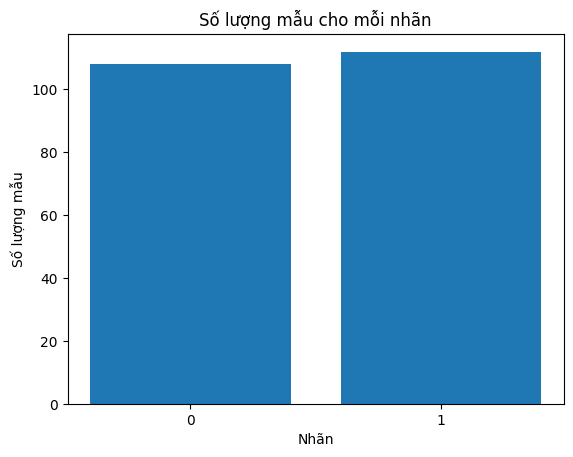

In [6]:
import pandas as pd
train_df = pd.DataFrame(train)
test_df = pd.DataFrame(test)


print(train_df.head())
label_counts = test_df['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Nhãn')
plt.ylabel('Số lượng mẫu')
plt.title('Số lượng mẫu cho mỗi nhãn')
plt.xticks([0, 1])
plt.show()

In [7]:
x_train = train_df["acoustic_data"]
y_train =train_df["label"]

x_test = test_df["acoustic_data"]
y_test = test_df["label"]


<class 'pandas.core.series.Series'>
(862,)


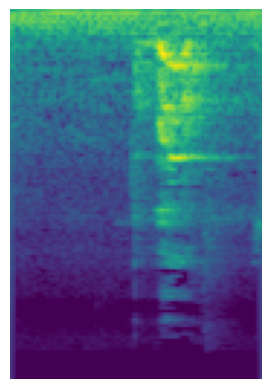

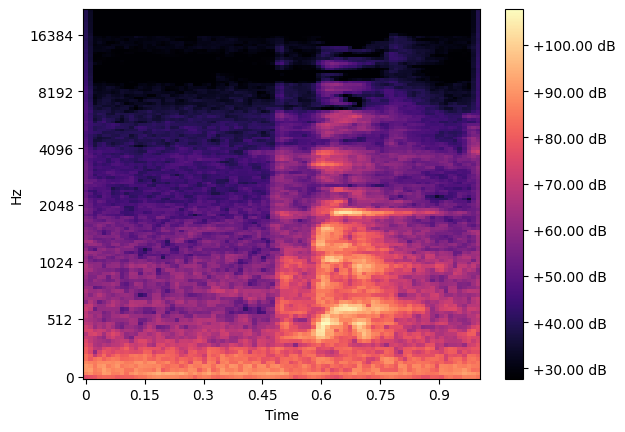

In [8]:
print(type(x_train))
print(x_train.shape)
plt.imshow(x_train[0].squeeze())
plt.axis('off')  # Ẩn các trục
plt.show()

librosa.display.specshow(x_train[0] ,sr =44100, x_axis="time", y_axis="mel")
plt.colorbar(format='%+0.2f dB')
# import tensorflow
# x_train_tf = tensorflow.convert_to_tensor(x_train, dtype=tensorflow.float32)

(862, 128, 87)
(220, 128, 87)
(862, 2)
(220, 2)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


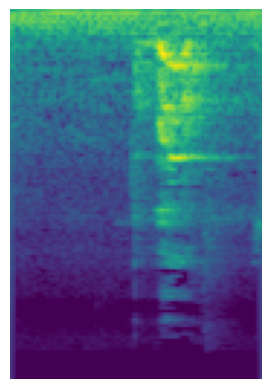

In [9]:
x_train_array = np.array(x_train.tolist())

x_train_reshaped = x_train_array.reshape(x_train_array.shape[0], 128, 87, 1)

x_train_reshaped = x_train_reshaped.astype('float32')


x_test_array = np.array(x_test.tolist())

x_test_reshaped = x_test_array.reshape(x_test_array.shape[0], 128, 87, 1)

x_test_reshaped = x_test_reshaped.astype('float32')


from keras.utils import to_categorical

y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print(x_train_array.shape)
print(x_test_array.shape)
print(y_train_encoded.shape)
print(y_test_encoded.shape)
print(y_train_encoded)




plt.imshow(x_train_reshaped[0])
plt.axis('off')  # Ẩn các trục
plt.show()




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


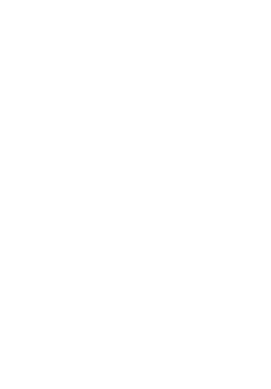

In [10]:
from tensorflow.keras.layers import Input, Lambda
import tensorflow as tf
rgb_layer_train  = Lambda(lambda x: tf.image.grayscale_to_rgb(x))(x_train_reshaped)
rgb_layer_test  = Lambda(lambda x: tf.image.grayscale_to_rgb(x))(x_test_reshaped)



plt.imshow(rgb_layer_train[0])
plt.axis('off')  # Ẩn các trục
plt.show()


In [11]:

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape = (128,87,3))




for layer in resnet_model.layers:
    layer.trainable = False



new_model = Sequential()

new_model.add(Flatten(input_shape=resnet_model.output_shape[1:]))

new_model.add(Dense(256, activation='relu'))  
new_model.add(Dropout(0.5))
new_model.add(Dense(2, activation='softmax')) 

new_model = tf.keras.Sequential([resnet_model, new_model])

optimizer = Adam(learning_rate=0.005, beta_1=0.95, beta_2=0.999)
new_model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

history = new_model.fit(rgb_layer_train, y_train_encoded, epochs=30, validation_data=(rgb_layer_test, y_test_encoded))
# test_loss, test_acc = new_model.evaluate(x_test_reshaped, y_test_encoded)
# print('Test accuracy:', test_acc)



Epoch 1/30


27/27 [==============================] - 17s 531ms/step - loss: 7.7438 - accuracy: 0.7645 - val_loss: 1.6441 - val_accuracy: 0.8455
Epoch 2/30
27/27 [==============================] - 13s 484ms/step - loss: 0.6605 - accuracy: 0.8712 - val_loss: 0.2633 - val_accuracy: 0.8864
Epoch 3/30
27/27 [==============================] - 12s 460ms/step - loss: 0.2345 - accuracy: 0.9200 - val_loss: 0.2262 - val_accuracy: 0.9182
Epoch 4/30
27/27 [==============================] - 14s 518ms/step - loss: 0.1734 - accuracy: 0.9327 - val_loss: 0.2496 - val_accuracy: 0.9227
Epoch 5/30
27/27 [==============================] - 14s 514ms/step - loss: 0.1199 - accuracy: 0.9443 - val_loss: 0.2410 - val_accuracy: 0.9364
Epoch 6/30
27/27 [==============================] - 14s 537ms/step - loss: 0.0909 - accuracy: 0.9640 - val_loss: 0.2435 - val_accuracy: 0.9364
Epoch 7/30
27/27 [==============================] - 14s 518ms/step - loss: 0.0846 - accuracy: 0.9722 - val_loss: 0.2640 - val_accuracy: 0.9

In [13]:
new_model.save("resnet50.h5")

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
